# MTRN4110 20T2 Lecture Vision II OpenCV Examples

# Canny edge detection

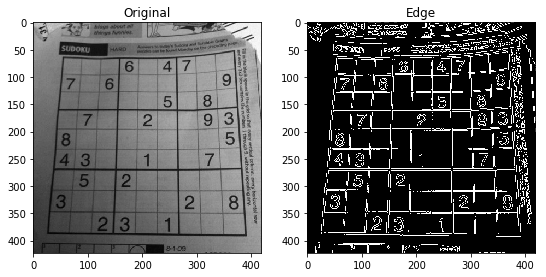

In [1]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

#canny edge detection
img = cv2.imread('sudoku.jpg',cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, threshold1 = 50, threshold2 = 100, apertureSize = 3)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (9, 5), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(edges, cmap='gray'), ax2.set_title("Edge")
plt.show()

# Hough transform

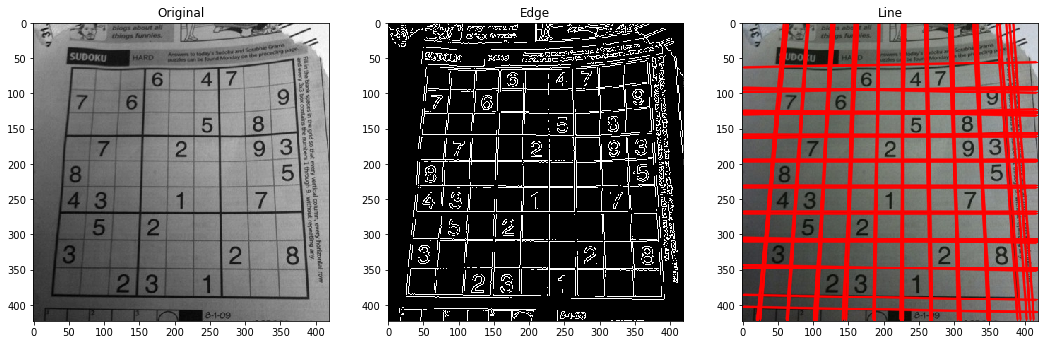

In [2]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

#canny edge detection
img = cv2.imread('sudoku.jpg',cv2.IMREAD_GRAYSCALE)
img_bgr = cv2.imread('sudoku.jpg')
edges = cv2.Canny(img, threshold1 = 50, threshold2 = 100, apertureSize = 3)

#hough transform
lines = cv2.HoughLines(edges, rho = 1, theta = np.pi/180, threshold = 160)

#draw lines
l,_,_ = lines.shape
for i in range(l):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_bgr, (x1,y1), (x2,y2), (0,0,255), 2, cv2.LINE_AA)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
#plot the image
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 10), ncols = 3)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(edges, cmap='gray'), ax2.set_title("Edge")
ax3.imshow(img_rgb, cmap='gray'), ax3.set_title("Line")
plt.show()

# Contour detection

shape 0 : m00 - 26709.0  area - 26709.0
shape 1 : m00 - 20900.5  area - 20900.5
shape 2 : m00 - 20065.0  area - 20065.0
shape 3 : m00 - 18234.5  area - 18234.5
shape 4 : m00 - 28729.0  area - 28729.0
shape 5 : m00 - 26514.0  area - 26514.0


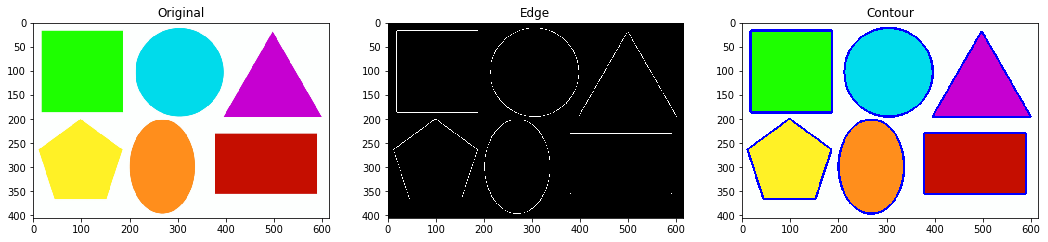

In [3]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

#canny edge detection
img_bgr = cv2.imread('shapes.png')
img_gray = cv2.imread('shapes.png',cv2.IMREAD_GRAYSCALE)
img_rgb_origin = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img_gray, threshold1 = 50, threshold2 = 100, apertureSize = 3)

#contour detection
img2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_bgr, contours, -1, (255, 0, 0), 3)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#plot the image
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 10), ncols = 3)
ax1.imshow(img_rgb_origin), ax1.set_title("Original")
ax2.imshow(edges, cmap='gray'), ax2.set_title("Edge")
ax3.imshow(img_rgb), ax3.set_title("Contour")

#calculate moments and areas
for i, cnt in enumerate(contours):
    m = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    print("shape", i, ": m00 -", m['m00'], " area -", area)

# Corner detection

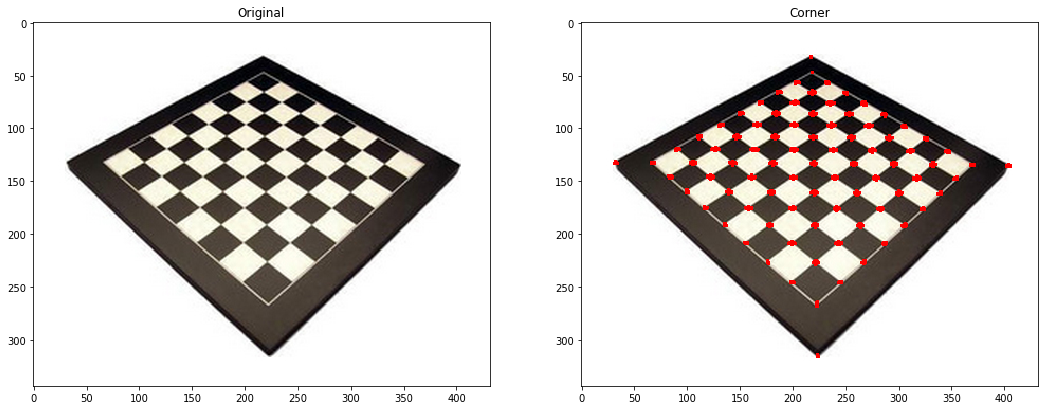

In [4]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

# image is loaded with imread command 
img_bgr = cv2.imread('chessboard.jpg')
img_rgb_origin = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

# modify the data type, setting to 32-bit floating point 
img_gray = np.float32(img_gray)

# apply the cv2.cornerHarris method to detect the corners with appropriate values as input parameters 
corners = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = 0.03)

# Results are marked through the dilated corners
corners = cv2.dilate(corners, None)

# Reverting back to the original image, with optimal threshold value 
img_bgr[corners > 0.01 * corners.max()] = [0, 0, 255]
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img_rgb_origin), ax1.set_title("Original")
ax2.imshow(img_rgb), ax2.set_title("Corner")
plt.show()

# SIFT

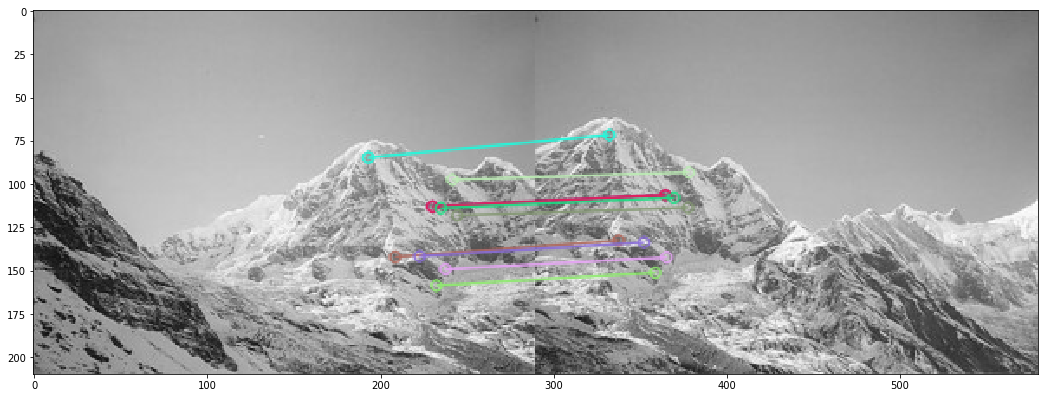

In [5]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

img1 = cv2.imread('mountain1.jpg',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('mountain2.jpg',cv2.IMREAD_GRAYSCALE)          # trainImage

# Initiate SIFT detector
sift  = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

plt.figure(figsize = (18, 10))
plt.imshow(img3)
plt.show()

# SURF

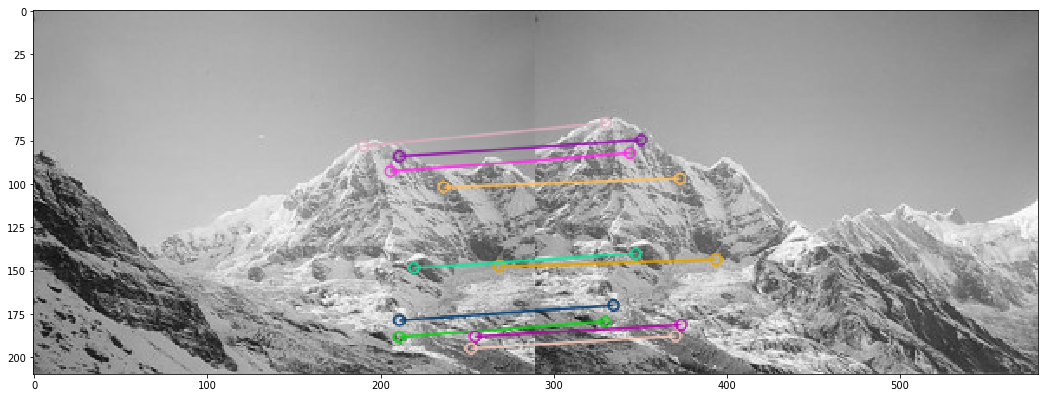

In [6]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

img1 = cv2.imread('mountain1.jpg',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('mountain2.jpg',cv2.IMREAD_GRAYSCALE)          # trainImage

# Initiate SURF detector
surf  = cv2.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SURF
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

plt.figure(figsize = (18, 10))
plt.imshow(img3)
plt.show()

# Face detection

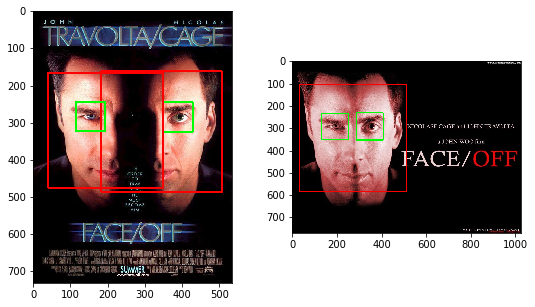

In [7]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

#load the classifiers downloaded 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#read the image and convert to grayscale format
img = cv2.imread('face_off_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#calculate coordinates 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
face_1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#read the image and convert to grayscale format
img = cv2.imread('face_off_2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#calculate coordinates 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
face_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (9, 5), ncols = 2)
ax1.imshow(face_1)
ax2.imshow(face_2)
plt.show()

# ArUco marker detection

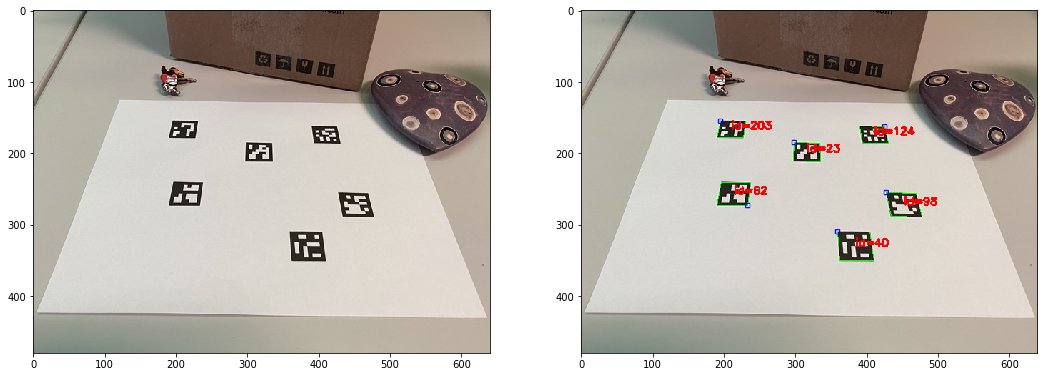

In [13]:
#import required libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

# # Uncomment below if you want to generate an ArUco marker for use
#
# # Load the predefined dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# # Generate the marker
markerImage = np.zeros((200, 200), dtype=np.uint8)
markerImage = cv2.aruco.drawMarker(dictionary, 1, 200, markerImage, 1)
#
# # Write to an image
cv2.imwrite("marker33.png", markerImage)
#
# # Uncomment above if you want to generate an ArUco marker for use

# Detect ArUco markers
# image is loaded with imread command 
img_bgr = cv2.imread('aruco.jpg')
img_rgb_origin = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

# Load the predefined dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# Initialize the detector parameters using default values
parameters =  cv2.aruco.DetectorParameters_create()

# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(img_rgb, dictionary, parameters=parameters)

img_rgb = cv2.aruco.drawDetectedMarkers(img_rgb, markerCorners, markerIds)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img_rgb_origin)
ax2.imshow(img_rgb)
plt.show()

# Object tracking

In [9]:
import cv2
import sys

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if __name__ == '__main__' :

    # Set up tracker.
    # Instead of MIL, you can also use

    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[2]

    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'GOTURN':
            tracker = cv2.TrackerGOTURN_create()
        if tracker_type == 'MOSSE':
            tracker = cv2.TrackerMOSSE_create()
        if tracker_type == "CSRT":
            tracker = cv2.TrackerCSRT_create()

    # Read video
    video = cv2.VideoCapture("chaplin.mp4")

    # Exit if video not opened.
    if not video.isOpened():
        print("Could not open video")
        sys.exit()

    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print('Cannot read video file')
        sys.exit()
    
    # Define an initial bounding box
    bbox = (287, 23, 86, 320)

    # Uncomment the line below to select a different bounding box
    bbox = cv2.selectROI(frame, False)

    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)

    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
        
        # Start timer
        timer = cv2.getTickCount()

        # Update tracker
        ok, bbox = tracker.update(frame)

        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
    
        # Display FPS on frame
        cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);

        # Display result
        cv2.imshow("Tracking", frame)

        # Exit if ESC pressed
        k = cv2.waitKey(10) & 0xff
        if k == 27 : break

    cv2.destroyAllWindows()